# Prediction of readmission of diabetic patients 

**The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. The aim of this project is to precited a diabetic patient's readmission**

## Data Set Description

* **encounter_id**	Unique identifier of an encounter
* **patient_nbr	r**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **admission_type_id**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **discharge_disposition_id**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **admission_source_id	**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **change**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission


In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score,mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data cleaning

**Summary of data cleaning** :
* Dropped columns with majority of values missing - 'weight','payer_code','medical_specialty'
* Dropped columns that didnot have meaningful info for prediction analysis e.g patient ID - 'encounter_id','patient_nbr'
* Removed rows that contained missing values
* Removed duplicate patient visits based on the first encounter of a patient.

#### Removing duplicate patient IDs

In [3]:
# Removing duplicate patients
# sorting by patient ID 
df.sort_values(["patient_nbr"], inplace = True) 
  
# dropping ALL duplicte values 
df.drop_duplicates(subset =["patient_nbr"], keep = 'first', inplace = True) 

#### Cleaning Missing Values

In [4]:
# Checking for coloumns that have most missing values:
for col in df.columns:
    print(col, df[col][df[col]=="?"].count()/df[col].count())

encounter_id 0.0
patient_nbr 0.0
race 0.02670656338264493
gender 0.0
age 0.0
weight 0.9601498923347969
admission_type_id 0.0
discharge_disposition_id 0.0
admission_source_id 0.0
time_in_hospital 0.0
payer_code 0.4272490841466484
medical_specialty 0.4818367404010179
num_lab_procedures 0.0
num_procedures 0.0
num_medications 0.0
number_outpatient 0.0
number_emergency 0.0
number_inpatient 0.0
diag_1 0.00016778992701138175
diag_2 0.0041807656813669285
diag_3 0.016597220280209178
number_diagnoses 0.0
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


In [5]:
# Dropping these columns as most of the data is missing:

df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

# Dropping only the rows of missing values:

df=df[df.gender != 'Unknown/Invalid']
df = df[df.A1Cresult != 'None']
drop_missing_values = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
drop_missing_values = drop_missing_values.union(set(df['diag_1'][df['diag_1'] == '?'].index))
drop_missing_values = drop_missing_values.union(set(df['diag_2'][df['diag_2'] == '?'].index))
drop_missing_values = drop_missing_values.union(set(df['diag_3'][df['diag_3'] == '?'].index))
drop_missing_values = drop_missing_values.union(set(df['race'][df['race'] == '?'].index))

# Removing the first 2 columns that contain Patient ID and encounter ID: these wont help with our predictions so we are dropping it

df = df.drop(['encounter_id','patient_nbr'], axis = 1)

---

## Feature Engineering

**Summary of feature engineering**
* Reduced the number of categories for various coulmns - 'admission_type_id', 'admission_source_id','discharge_disposition_id'
* Using ordinal category encoder, converted varoius columns into numerical data
* Based on prevous studies, the only medication that varied significantly across the patients was the delivery of insulin, while other medications remained common among all the patients.
* Based on prevous studies, relationship between readmission and the HbA1c measurement depends on the diagnosis i.e. 'diag_1',diag_2,diag_3. 
* ICD9 code for diabetes: 250.xx, all other codes were dropped as they were not related to diabeties care.
* Determined columns with large skewness (majorly right skewed) and transformed the values using square roots transformation. Remaining columns normalized using standard scalar.
*  Balanced target classes using SMOTE function.

#### Collapsing similar categories

In [6]:
# Reduce the number of categories in the various Id columns to a minimum level:

#admission_type_id : we will combine various Ids into 'Emergency' or 'Others'
df['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' for val in df['admission_type_id']], index=df.index)

# admission_source_id: Combining IDs into 3 categories -'Emergency Room', 'Referrals', 'Others'
df['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referrals' if val == 1 else 'Others' 
                                              for val in df['admission_source_id']], index=df.index)

# discharge_disposition_id: Combining IDs into 2 categories - 'Discahrged to home' or 'other'
df['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other' 
                                              for val in df['discharge_disposition_id']], index=df.index)


#### Changing categorical fetures to numerical data

In [7]:
#Changing age categories fom [0-10...90-100] to 1 to 10:

for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

df['age'] = df['age'].astype('int64')
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)


# Changing categorical values to numerical:

encoder = ce.OrdinalEncoder(cols=['admission_type_id','admission_source_id','discharge_disposition_id','race',
                                  'A1Cresult','max_glu_serum','insulin'])
encoder.fit(df)
df = encoder.transform(df) 


df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)  
   
    
#changing the Target values Readmitted from category to numerical:
df['readmitted'] = df['readmitted'].replace('>30', 1)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

#### Feature selection on Diagnoses & Medication

In [8]:
# keeping only 'insulin' and removing the other 22 diabetes medications
df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

# removing 'diag_2' and 'diag_3' and keeping ICP codes of 250.xx (related to diabeties)
df['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_1']], index=df.index)
df['diag_2'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_2']], index=df.index)
df['diag_3'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_3']], index=df.index)
#df.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

In [ ]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax1 = data.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = data.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = data.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = data.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

#### Normalization/standardization of features

In [9]:
# Determining Skewness inorder to see which features require skewness reduction:
# Few numerical columns are highly positively skewed (Right Skewed) 
# we use Square roots (as the counted values are mostly rather small) :

df.skew(axis = 0, skipna = True)

race                         2.842378
gender                       0.029683
age                         -0.599576
admission_type_id            0.437291
discharge_disposition_id    -0.633596
admission_source_id          1.173320
time_in_hospital             1.033424
num_lab_procedures          -0.267204
num_procedures               1.329574
num_medications              1.430320
number_outpatient           13.675596
number_emergency             8.617874
number_inpatient             5.081129
diag_1                       1.873786
diag_2                       1.887667
diag_3                       1.732087
number_diagnoses            -0.846717
max_glu_serum                8.421262
A1Cresult                   -0.109649
insulin                      0.635600
change                      -0.181666
diabetesMed                 -1.728438
readmitted                   0.799795
dtype: float64

In [10]:
# Features with highest skew; reducing skewness through square roots
df['number_outpatient'] = df['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
df['number_emergency'] = df['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
df['number_inpatient'] = df['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [11]:
# Normalizing/standariztion the remaning numerical features as these have the skewness;

feature_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

scaler = preprocessing.StandardScaler().fit(df[feature_cols])
data_scaler = scaler.transform(df[feature_cols])

df_scaled = pd.DataFrame(data=data_scaler, columns=feature_cols, index=df.index)
df.drop(feature_cols, axis=1, inplace=True)
df = pd.concat([df, df_scaled], axis=1)

#### Creating train/test split

In [12]:
X = df.drop(['readmitted'],axis=1)
y = df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#### Balancing target class values

In [13]:
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_bal, train_output_bal = sm.fit_sample(X_train, y_train)
print('Balanced dataset shape {}'.format(Counter(train_output_bal)))

Original dataset shape Counter({0: 6928, 1: 3208})
Balanced dataset shape Counter({0: 6928, 1: 6928})


In [14]:
# Train/test plit using balanced class data
X_train, X_test, y_train, y_test = train_test_split(train_input_bal, train_output_bal, test_size=0.20, random_state=0)

---

## Baseline Model

**Summary of Baseline model**
* Used an ensemble of learning algorithms to determine best classifer to use.
* Random Forest classifer achived an test accuracy score of -

In [15]:
ensemble_clf =[LogisticRegression(max_iter=100000,fit_intercept=True, penalty='l2'),
               LinearSVC(loss='hinge',random_state=100),
               SVC(),
               KNeighborsClassifier(),
               RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10),
               DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10),
               GaussianNB()]

for clf in (ensemble_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print('Performance metrics for ',clf.__class__.__name__,' :- ')
    print('Accuracy score ', accuracy_score(y_test,y_pred))
    print('Cross val score',cross_val_score(clf, X_train,y_train, cv=10, scoring='accuracy').mean())
    print('Precision', precision_score(y_test, y_pred))
    print('Recall', recall_score(y_test, y_pred))
    print('f1', f1_score(y_test, y_pred))
    print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
    print("------------------------------------------------------------\n------------------------------------------------------------\n")



Performance metrics for  LogisticRegression  :- 
Accuracy score  0.6403318903318903
Cross val score 0.6388476462679813
Precision 0.6546546546546547
Recall 0.6188786373314408
f1 0.6362641371762131
Confusion Matrix: 
 [[903 460]
 [537 872]]
------------------------------------------------------------
------------------------------------------------------------

Performance metrics for  LinearSVC  :- 
Accuracy score  0.5667388167388168
Cross val score 0.5422163753731368
Precision 0.8421052631578947
Recall 0.1816891412349184
f1 0.29889083479276124
Confusion Matrix: 
 [[1315   48]
 [1153  256]]
------------------------------------------------------------
------------------------------------------------------------

Performance metrics for  SVC  :- 
Accuracy score  0.6154401154401155
Cross val score 0.6159350961773218
Precision 0.6543654365436543
Recall 0.5159687721788503
f1 0.5769841269841269
Confusion Matrix: 
 [[979 384]
 [682 727]]
--------------------------------------------------------

#### Best estimator using baseline model

**Based on the above reuslts we see that Random Forest classifer provides highest accuracy**

## Improved Random Forest classifer model

**Summary of improved model**
* Conducted Grid search using Cross validation.
* Used RFE to determine most important features- used forst 11 features based on baseline model's Random forest classifer.
* Ran model across differnt parameters - most change in score noticed with changes in n_estimators and max_depth
* Achived an accuracy of 76%

#### Imporved feature selection

In [16]:
# Using RFe to determine most important columns
classifier = RandomForestClassifier(n_estimators = 70, max_depth=50, criterion = "gini", min_samples_split=10)
rfe = RFE(classifier, 11)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['race', 'age', 'A1Cresult', 'insulin', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_diagnoses', 'number_inpatient', 'number_outpatient'],
      dtype='object')

#### Hyperparameter Tuning - Grid Search

In [17]:
param_grid = [{'n_estimators' : [70,100,150,190],
               'max_depth': [50,60,70,],
               'criterion': ['gini', 'entropy']}]

gs = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=10,random_state=123),
                  param_grid=param_grid,
                  iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=10)

gs.fit(X_train[X_train.columns[rfe.support_]],y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 76.25%
Best Params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 190}


#### Test accuracy score

In [18]:
print('Test Accuracy score: %.2f%%' % (gs.best_estimator_.score(X_test[X_test.columns[rfe.support_]], y_test)*100))

Test Accuracy score: 77.31%


## Important features:

Top 10 features are: 
diag_2
admission_source_id
discharge_disposition_id
diag_3
diag_1
gender
max_glu_serum
admission_type_id
A1Cresult
age


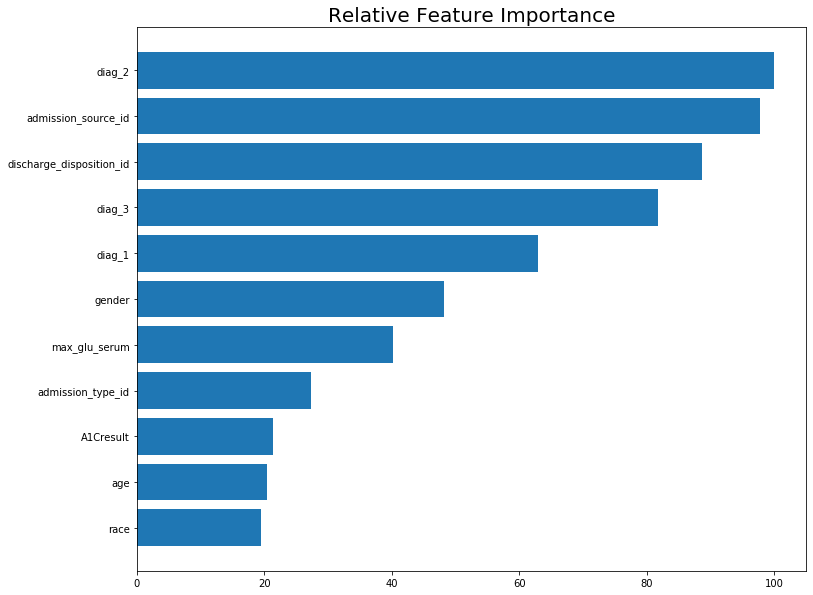

In [19]:
# Checking which features is important to a model:

importances = gs.best_estimator_.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

## Results and understandings